In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pokemon_df = pd.read_csv("/content/Pokemon.csv")

pokemon_df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Create a histogram of column "Speed"

Text(0, 0.5, 'Frequency')

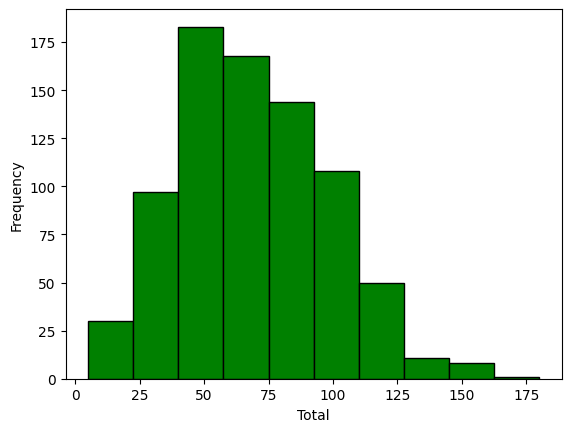

In [2]:
plt.hist(pokemon_df['Speed'], color = 'green', edgecolor = 'black')
plt.xlabel('Total')
plt.ylabel('Frequency')

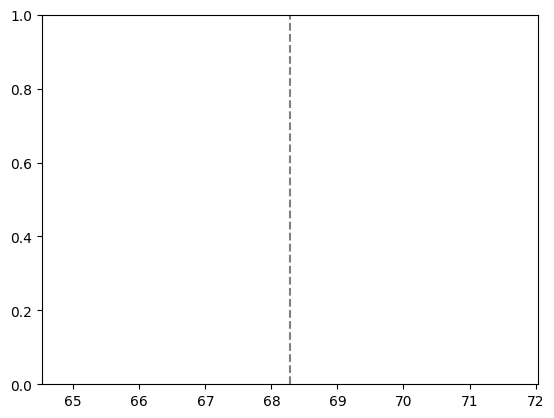

In [3]:
### Add min, max, mean (avarage) lines
plt.axvline(pokemon_df['Speed'].mean(), linestyle='dashed', color='gray')

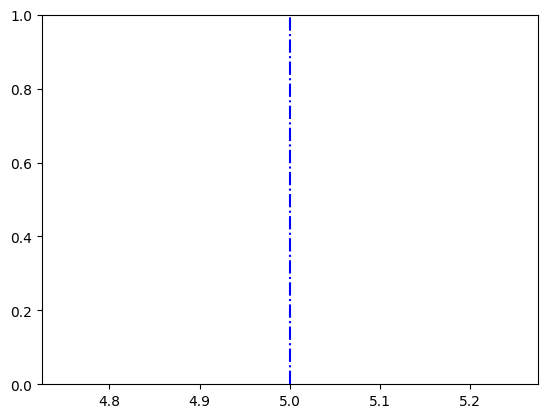

In [4]:
# Min line
plt.axvline(pokemon_df['Speed'].min(), linestyle = 'dashdot', color='blue')

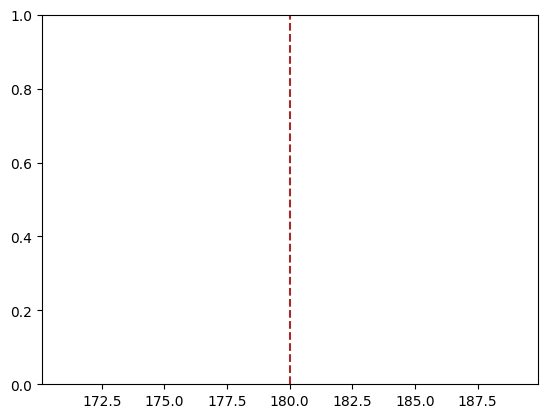

In [5]:
# Max line
plt.axvline(pokemon_df['Speed'].max(), linestyle = 'dashed', color='brown')

# CORRELATION

Text(0, 0.5, 'Defense')

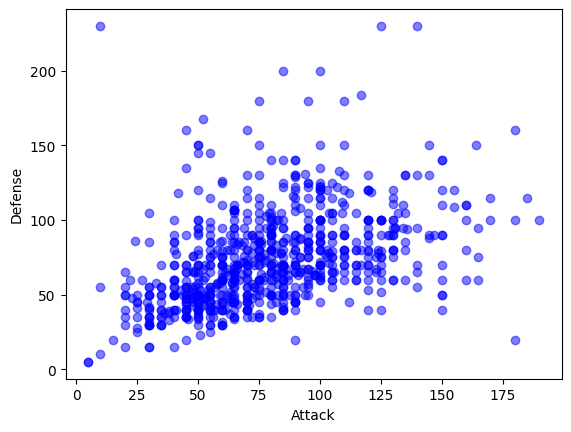

In [6]:
# scatter plot betwwen variables: Attack and Defense

plt.scatter(pokemon_df['Attack'],pokemon_df['Defense'], color='blue', alpha=0.5)
plt.xlabel('Attack')
plt.ylabel('Defense')

Text(0.5, 1.0, 'Scatter plot')

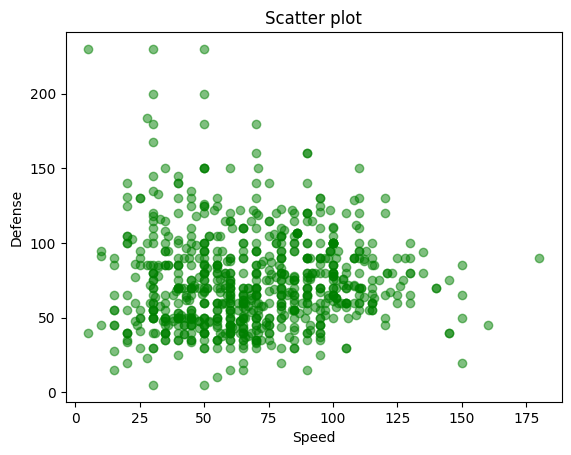

In [7]:
# scatterplot for virables: Speed and Defense

plt.scatter(pokemon_df['Speed'],pokemon_df['Defense'], color='green', alpha=0.5)
plt.xlabel('Speed')
plt.ylabel('Defense')
plt.title('Scatter plot')

Text(0.5, 1.0, 'Scatter plot')

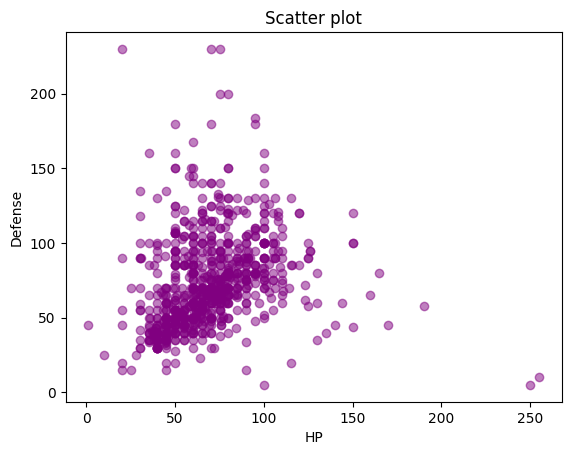

In [8]:
# scatterplot for virables: HP and Defense

plt.scatter(pokemon_df['HP'],pokemon_df['Defense'], color='purple', alpha=0.5)
plt.xlabel('HP')
plt.ylabel('Defense')
plt.title('Scatter plot')

## Pearson correlation (most used)

- Result of this correlation calcualtion is between -1 and 1.
- -1 means perfect negative relationship
-  1 means perfect positive relationship

In [9]:
# Pearson correlation between Attack/Defense

correlation1 = pokemon_df['Attack'].corr(pokemon_df['Defense'])
correlation1

0.4386870551184892

In [10]:
# Pearson correlation between Speed/Defense

correlation1 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
correlation1

0.015226598088597448

In [11]:
# Select only numeric columns

numeric_columns = pokemon_df.select_dtypes(include=('number'))
numeric_columns = numeric_columns.drop('#', axis=1)
numeric_columns

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6
796,700,50,160,110,160,110,110,6
797,600,80,110,60,150,130,70,6
798,680,80,160,60,170,130,80,6


In [12]:
# iterate trough column Attack

target_column = 'Attack'
correlation_results = {} #key = column, value = pearson_correlation

for col in numeric_columns.columns:
  if col == 'Attack':
    continue #iterates trough all numberic columns
  correlation = pokemon_df[target_column].corr(pokemon_df[col])
  correlation_results[col] = correlation

correlation_results

{'Total': 0.7362106519949293,
 'HP': 0.422386028776223,
 'Defense': 0.4386870551184892,
 'Sp. Atk': 0.396361755349232,
 'Sp. Def': 0.26398955110108846,
 'Speed': 0.38123973924108967,
 'Generation': 0.051451336708469686}

In [13]:
# iterate trough column Attack

print(f'The Pearsons Correlation between Attack and the other columns is as follows:')
for column, correlation in correlation_results.items():
  print(f'{column}: {correlation}') #same result as previous for-loop example

The Pearsons Correlation between Attack and the other columns is as follows:
Total: 0.7362106519949293
HP: 0.422386028776223
Defense: 0.4386870551184892
Sp. Atk: 0.396361755349232
Sp. Def: 0.26398955110108846
Speed: 0.38123973924108967
Generation: 0.051451336708469686


## Correlation matrix

In [14]:
# matrix is as long as wide as dataframe...

numeric_columns.drop(columns=['Total'], inplace=True) #eemaldame Total read

correlation_matrix = numeric_columns.corr() #all columns are numberic here
correlation_matrix #same result as was previous for-loop example

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121
Generation,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000


# Visualizing with SEABORN

Text(0.5, 1.0, 'Correlation Matrix')

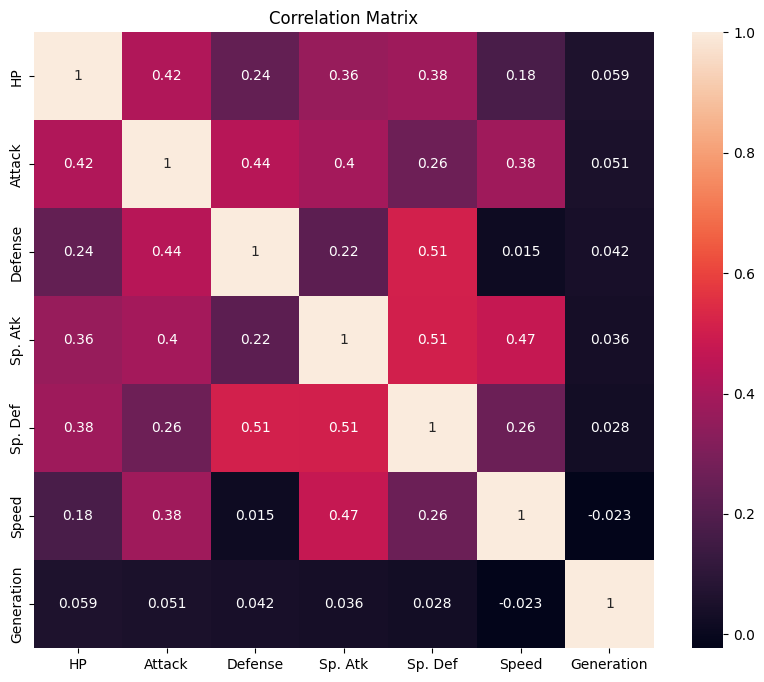

In [16]:
# seaborn heatmap

import seaborn as sns

plt.figure(figsize=(10,8)) # saame muuta pildi suurust
sns.heatmap(correlation_matrix, annot = True) # annot=adding annotations/values
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Correlation Matrix')

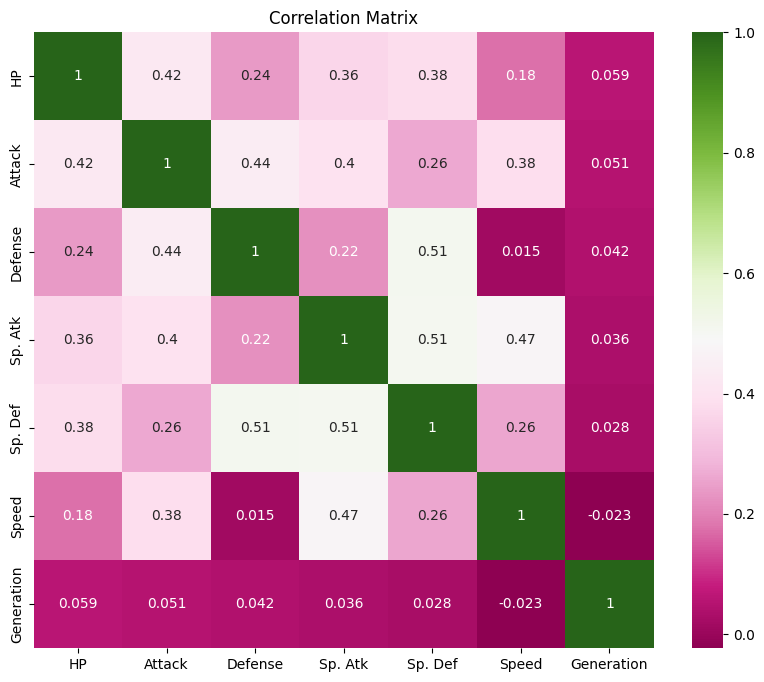

In [17]:
# seaborn color paletts; cmap = "name" - googelda!

plt.figure(figsize=(10,8)) # saame muuta pildi suurust
sns.heatmap(correlation_matrix, annot = True, cmap="PiYG")
plt.title('Correlation Matrix')

## SPURIOS CORRELATIONS

(expamle: hot summer day, ice cream sales and sunburns)

## LINEAR REGRESSION

(predict one value based on the other)

Pearson correlation coefficient: 0.015226598088597448
Pearson correlation coefficient: 0.4386870551184892


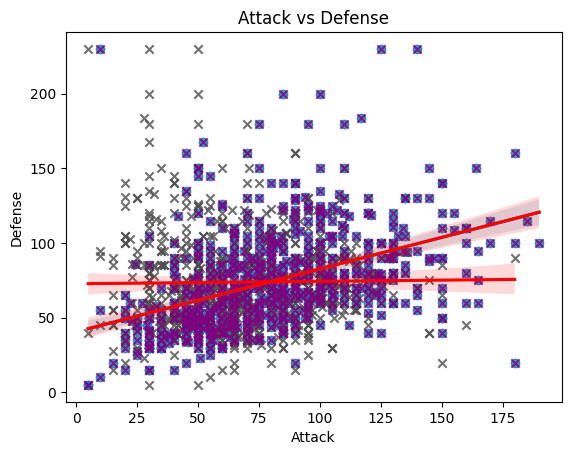

In [18]:
sns.regplot(x='Attack', y='Defense', data=pokemon_df)

# look different grafic/lines: https://seaborn.pydata.org/generated/seaborn.regplot.html
sns.regplot(
    data=pokemon_df, x='Speed', y="Defense",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
)

correlation2 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
print('Pearson correlation coefficient:', correlation2)

sns.regplot(x='Attack', y='Defense', data=pokemon_df, color='purple', ci=99, marker='x', line_kws={'color':'red'})
plt.title('Attack vs Defense')

correlation2 = pokemon_df['Attack'].corr(pokemon_df['Defense'])
print('Pearson correlation coefficient:', correlation2)